In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
np.random.seed(42)

In [5]:
df = pd.read_csv("Sammamish-Training.csv")

df.head(2)

,ML Number,Status,List Price,Sold Price,Year,List Date,Sold Date,DOM,Address,City Name,...,Selling Office Name,Selling Office Phone,Senior Exemption,Sewer Company,Sewer Type,Show Addressto Public,Show Map Link,Site Features,Community,Sale Type
0,466258.0,Sold,4499000.0,4036000.0,2013.0,4/1/2013,8/21/2013,117.0,222 E 208 Lake Sammamish Pkwy SE,Sammamish,...,Windermere Real Estate/East,(425) 455-5300,False,City of Sammamish,Sewer Connected,True,True,"Cable TV, Deck, Disabled Access, Dog Run, Fenc...",East Lake Sammamish,MLS
1,435709.0,Sold,3700000.0,3685000.0,2013.0,1/8/2013,1/11/2013,NaN,333 E Lake Sammamish Pkwy SE,Sammamish,...,Windermere Real Estate/East,(425) 643-5500 x246,True,Sammamish Plateau,Available,True,True,"Cable TV, Dock, Gas Available, High Speed Inte...",Lake Sammamish,MLS


In [6]:
df.shape

(4951, 109)

In [7]:
drop_cols = ["ML Number", "Status","Address","Zip Code",
             "Track","Showing Information","Public Comments","Remarks","Levels", "Interior",
             "Cross Street","Unit Number","Latitude","Longitude","Taxes Annual","Leased Equipment",
             "Legal Description","Lot Measurement","Lot Number","Virtual Tour URL","Photo Count",
             "Manufactured Home Manufacturer","Manufactured Home Model Number","Manufactured Home Serial Number",
             "Potential Terms","Preliminary Title Ordered","Publish to Internet","School District",
             "Selling Agent Cellular","Selling Agent Full Name","Selling Agent Id", "Map Code",
             "Selling Office Id", "Selling Office Name", "Selling Office Phone","Association Dues", "Tax Year",
             "Senior Exemption", "Show Addressto Public", "Show Map Link", "Site Features", "Community", "Sale Type ",
             "City Name", "State", "Map Code", "Sewer Company", "Garage", "Style", "Heating and Cooling", 
             "Elementary School", "Junior High School", "High School", "Exterior", "Other Features", "APN", 
             "Builder", "Building Information", "Contingent Date", "Date Entered", "County", "Energy Source", 
             "Floor Covering", "Foundation", "Matrix Modified DT","Lot Details", "Water", "Water Company",
             "Waterfront Footage", "Water Heater Location", "Water Heater Type", "Status Change Date", 
             "Building Complex Or Project Name", "Topography", "Pending Date", "Phone to Show Number",
             "Possession", "Power Company", "Roof", "Sewer Type", 'Architecture', 'View', "Area", "Inactive Date",
             "Third Party Approval Required"]

In [8]:
df = df.drop(drop_cols, axis=1)

df.shape

(4951, 25)

In [9]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
List Price,4947,NaN,NaN,NaN,771777,365102,65000,560000,729000,899950,4.55e+06
Sold Price,4948,NaN,NaN,NaN,774550,354888,1,567000,735950,912079,4.81e+06
Year,4948,NaN,NaN,NaN,2014.73,1.28376,2013,2014,2015,2016,2017
List Date,4948,1360,6/2/2016,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sold Date,4948,1106,6/28/2013,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOM,4628,NaN,NaN,NaN,32.1327,52.3878,1,5,10,36,923
Bedrooms,4947,NaN,NaN,NaN,3.78431,0.92554,0,3,4,4,9
Bathrooms,4947,NaN,NaN,NaN,2.76834,0.773068,0,2.5,2.5,3.25,7
Sq Foot,4948,NaN,NaN,NaN,2877.18,1056.65,0,2130,2880,3560,10380
Age,4947,NaN,NaN,NaN,1996.58,14.289,1905,1987,1999,2006,2106


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 25 columns):
List Price                   4947 non-null float64
Sold Price                   4948 non-null float64
Year                         4948 non-null float64
List Date                    4948 non-null object
Sold Date                    4948 non-null object
DOM                          4628 non-null float64
Bedrooms                     4947 non-null float64
Bathrooms                    4947 non-null float64
Sq Foot                      4948 non-null float64
Age                          4947 non-null float64
Lot Size                     4930 non-null float64
Pool                         100 non-null object
Property Type                4948 non-null object
Building Condition           3335 non-null object
Bus Line Nearby              2544 non-null object
CDOM                         4846 non-null float64
Fireplaces Total             4861 non-null float64
Lot Square Footage           4930

In [14]:
# drop records where Sold Price is null
df = df.dropna(subset=['Sold Price'])
df.shape

(4948, 25)

### Process data

In [15]:
# impute Sold price with List price and vice a versa
df['Sold Price'] = df['Sold Price'].combine_first(df['List Price'])
df['List Price'] = df['List Price'].combine_first(df['Sold Price'])

In [16]:
# impute DOM with CDOM and vice a versa
df['DOM'] = df['DOM'].combine_first(df['CDOM'])
df['CDOM'] = df['CDOM'].combine_first(df['DOM'])

In [14]:
df['Lot Size'] = df['Lot Size'].combine_first(df['Lot Square Footage '])
df['Lot Square Footage '] = df['Lot Square Footage '].combine_first(df['Lot Size'])


In [17]:
df['Square Footage Unfinished'] = df['Square Footage Unfinished'].fillna(0)

In [18]:
df['Fireplaces Total'] = df['Fireplaces Total'].fillna(0)

In [20]:
df['Fireplaces Total'] = df['Fireplaces Total'].fillna(0)

#### check correlation

In [21]:
numeric_df = df.select_dtypes(include='number')
numeric_df.shape

(4948, 16)

In [22]:
corr = numeric_df.corr()
corr.to_csv("numeric_correlation.csv")

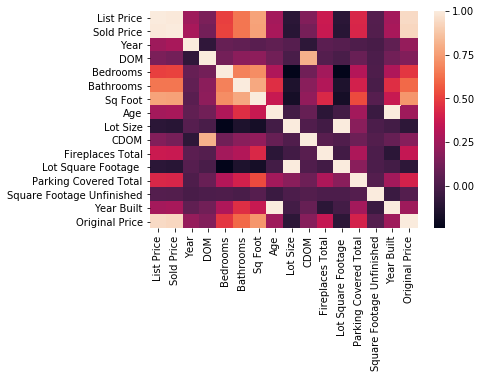

In [23]:
corr = numeric_df.corr()
sns.heatmap(corr)

In [24]:
# drop highly correlated variables
highly_corr_vars = ['Original Price', 'Lot Square Footage ', 'CDOM']

df = df.drop(highly_corr_vars, axis=1)

df.shape

(4948, 22)

In [25]:
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4950
Data columns (total 13 columns):
List Price                   4948 non-null float64
Sold Price                   4948 non-null float64
Year                         4948 non-null float64
DOM                          4846 non-null float64
Bedrooms                     4947 non-null float64
Bathrooms                    4947 non-null float64
Sq Foot                      4948 non-null float64
Age                          4947 non-null float64
Lot Size                     4930 non-null float64
Fireplaces Total             4948 non-null float64
Parking Covered Total        4462 non-null float64
Square Footage Unfinished    4948 non-null float64
Year Built                   4947 non-null float64
dtypes: float64(13)
memory usage: 541.2 KB


#### check categorical data

In [26]:
cat_df = df.select_dtypes(exclude='number')
cat_df.shape

(4948, 9)

In [27]:
cat_df.describe(include=['O'])

,List Date,Sold Date,Pool,Property Type,Building Condition,Bus Line Nearby,Bank Or Real Estate Owned,New Construction State,Occupant Type
count,4948,4948,100,4948,3335,2544,4947,958,4947
unique,1360,1106,4,4,8,2,2,3,4
top,6/2/2016,6/28/2013,Community,Residential,Very Good,True,False,Under Construction,Owner
freq,24,21,62,4462,1763,2426,4889,414,2559


In [28]:
df['List Date'] = pd.to_datetime(df['List Date'], format='%m/%d/%Y')
df['Sold Date'] = pd.to_datetime(df['Sold Date'], format='%m/%d/%Y')

In [29]:
df['days_to_sold'] = df.apply(lambda row: (row['Sold Date']-row['List Date']).days, axis=1)

In [27]:
# impute with None if no pool
cat_df.groupby('Pool')['Pool'].count()


Pool
Above Ground     4
Community       62
In-Ground       28
Indoor           6
Name: Pool, dtype: int64

In [34]:
df['Pool'].isna().sum()

4848

In [28]:
df['Pool'] = df['Pool'].fillna('No-Pool')


In [29]:
cat_df.groupby('Property Type')['Property Type'].count()

Property Type
Condominium                       484
Letter of Authorization (LOA)       1
Manufactured Homes                  1
Residential                      4462
Name: Property Type, dtype: int64

In [30]:
# impute nan with Good
cat_df.groupby('Building Condition')['Building Condition'].count()

Building Condition
Average                 79
Fair                    29
Fixer                   25
Good                   842
Remodeled              273
Restored                 1
Under Construction     323
Very Good             1763
Name: Building Condition, dtype: int64

In [31]:
df['Building Condition'] = df['Building Condition'].fillna('Good')

In [32]:
# impute nan with False
cat_df.groupby('Bus Line Nearby')['Bus Line Nearby'].count()

Bus Line Nearby
False     118
True     2426
Name: Bus Line Nearby, dtype: int64

In [33]:
df['Bus Line Nearby'] = df['Bus Line Nearby'].fillna(False)

In [34]:
cat_df.groupby('Bank Or Real Estate Owned')['Bank Or Real Estate Owned'].count()

Bank Or Real Estate Owned
False    4889
True       58
Name: Bank Or Real Estate Owned, dtype: int64

In [35]:
# if Square Footage Unfinished is 0 then set nulls as Completed else if it is equal to Sq Foot set as presale else under construction
cat_df.groupby('New Construction State')['New Construction State'].count()

New Construction State
Completed             231
Presale               313
Under Construction    414
Name: New Construction State, dtype: int64

In [36]:
df[(df['Sq Foot'] == df['Square Footage Unfinished']) & (df['Sq Foot']!=0)].shape

(7, 23)

In [37]:
def fill_construction_state(row):
    if isinstance(row['New Construction State'], float) == True:
        if row['Square Footage Unfinished'] == 0:
            return 'Completed'
        elif row['Square Footage Unfinished'] == row['Sq Foot']:
            return 'Presale'
        return 'Under Construction'
    else:
        return row['New Construction State']

df['New Construction State'] = df.apply(fill_construction_state, axis=1)

In [38]:
df.groupby('New Construction State')['New Construction State'].count()

New Construction State
Completed             4050
Presale                320
Under Construction     578
Name: New Construction State, dtype: int64

In [39]:
cat_df.groupby('Occupant Type')['Occupant Type'].count()

Occupant Type
Owner      2559
Presale     323
Tenant      130
Vacant     1935
Name: Occupant Type, dtype: int64

### Create Dummy Variables and Final Dataset

In [40]:
df = df.dropna()
df = df.drop(['List Date', 'Sold Date'], axis=1)
df.shape

(4386, 21)

In [41]:
df.head(2).T

,0,2
List Price,4.499e+06,2.895e+06
Sold Price,4.036e+06,2.7725e+06
Year,2013,2013
DOM,117,25
Bedrooms,4,4
Bathrooms,5.75,4.25
Sq Foot,7230,4710
Age,2000,2007
Lot Size,978070,17176
Pool,No-Pool,No-Pool


Get dummy variables

In [42]:
cat_df = df.select_dtypes(exclude='number')
cat_df.shape

(4386, 7)

In [43]:
cat_dummies = pd.get_dummies(cat_df)
cat_dummies.shape

(4386, 24)

In [44]:
cat_dummies.head(2)

,Bus Line Nearby,Pool_Above Ground,Pool_Community,Pool_In-Ground,Pool_Indoor,Pool_No-Pool,Property Type_Residential,Building Condition_Average,Building Condition_Fair,Building Condition_Fixer,...,Building Condition_Very Good,Bank Or Real Estate Owned_False,Bank Or Real Estate Owned_True,New Construction State_Completed,New Construction State_Presale,New Construction State_Under Construction,Occupant Type_Owner,Occupant Type_Presale,Occupant Type_Tenant,Occupant Type_Vacant
0,True,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
2,False,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,1,1,0,0,0


Get numeric data

In [45]:
numeric_df = df.select_dtypes(include='number')
numeric_df.shape

(4386, 14)

In [46]:
# final dataset
final_df = pd.concat([numeric_df, cat_dummies], axis=1)
final_df.head(2)

,List Price,Sold Price,Year,DOM,Bedrooms,Bathrooms,Sq Foot,Age,Lot Size,Fireplaces Total,...,Building Condition_Very Good,Bank Or Real Estate Owned_False,Bank Or Real Estate Owned_True,New Construction State_Completed,New Construction State_Presale,New Construction State_Under Construction,Occupant Type_Owner,Occupant Type_Presale,Occupant Type_Tenant,Occupant Type_Vacant
0,4499000.0,4036000.0,2013.0,117.0,4.0,5.75,7230.0,2000.0,978070.0,1.0,...,1,1,0,0,0,1,0,0,1,0
2,2895000.0,2772500.0,2013.0,25.0,4.0,4.25,4710.0,2007.0,17176.0,2.0,...,1,1,0,0,0,1,1,0,0,0


In [47]:
final_df.shape

(4386, 38)

In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4386 entries, 0 to 4950
Data columns (total 38 columns):
List Price                                   4386 non-null float64
Sold Price                                   4386 non-null float64
Year                                         4386 non-null float64
DOM                                          4386 non-null float64
Bedrooms                                     4386 non-null float64
Bathrooms                                    4386 non-null float64
Sq Foot                                      4386 non-null float64
Age                                          4386 non-null float64
Lot Size                                     4386 non-null float64
Fireplaces Total                             4386 non-null float64
Parking Covered Total                        4386 non-null float64
Square Footage Unfinished                    4386 non-null float64
Year Built                                   4386 non-null float64
days_to_sold          

In [49]:
X = final_df.drop('Sold Price', axis=1)
y = final_df['Sold Price']

### Create train test data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
print(X_train.shape, y_train.shape)

((3070, 37), (3070L,))


### Train model

In [52]:
model_dt = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
print("Train accuracy: ", model_dt.score(X_train, y_train))
print("Test accuracy: ", model_dt.score(X_test, y_test))

('Train accuracy: ', 0.9970071569977893)
('Test accuracy: ', 0.9884692750078794)


### Test dataset

In [53]:
test_df = pd.read_excel('Sammamish-Test.xlsx')
test_df.head(2)

,ML Number,Status,List Price,Sold Price,Year,List Date,Sold Date,DOM,Address,City Name,...,Selling Office Name,Selling Office Phone,Senior Exemption,Sewer Company,Sewer Type,Show Addressto Public,Show Map Link,Site Features,Community,Sale Type
0,1119129,Sold,600000,637500,2017,2017-05-05,2017-06-09,5,1346 222 Place NE,Sammamish,...,Coldwell Banker Bain,(425) 771-6444,False,NE Sammamish Sewer,Sewer Connected,True,True,"Deck, Gas Available, High Speed Internet",Sammamish,MLS
1,1113595,Sold,578000,627000,2017,2017-04-27,2017-06-08,12,540 227th Ct NE,Sammamish,...,The Cascade Team,(425) 395-4399,False,NaN,NaN,True,True,NaN,Sammamish,MLS


In [54]:
test_df = test_df.drop(drop_cols, axis=1)
test_df.shape

(100, 25)

In [55]:
# impute Sold price with List price and vice a versa
test_df['Sold Price'] = test_df['Sold Price'].combine_first(test_df['List Price'])
test_df['List Price'] = test_df['List Price'].combine_first(test_df['Sold Price'])

# impute DOM with CDOM and vice a versa
test_df['DOM'] = test_df['DOM'].combine_first(test_df['CDOM'])
test_df['CDOM'] = test_df['CDOM'].combine_first(test_df['DOM'])

test_df['Lot Size'] = test_df['Lot Size'].combine_first(test_df['Lot Square Footage '])
test_df['Lot Square Footage '] = test_df['Lot Square Footage '].combine_first(test_df['Lot Size'])

test_df['Square Footage Unfinished'] = test_df['Square Footage Unfinished'].fillna(0)

test_df['Fireplaces Total'] = test_df['Fireplaces Total'].fillna(0)

test_df['Fireplaces Total'] = test_df['Fireplaces Total'].fillna(0)

In [56]:
test_df = test_df.drop(highly_corr_vars, axis=1)
test_df.shape

(100, 22)

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
List Price                   100 non-null int64
Sold Price                   100 non-null int64
Year                         100 non-null int64
List Date                    100 non-null datetime64[ns]
Sold Date                    100 non-null datetime64[ns]
DOM                          100 non-null int64
Bedrooms                     100 non-null int64
Bathrooms                    100 non-null float64
Sq Foot                      100 non-null int64
Age                          100 non-null int64
Lot Size                     97 non-null float64
Pool                         0 non-null float64
Property Type                100 non-null object
Building Condition           21 non-null object
Bus Line Nearby              56 non-null float64
Fireplaces Total             100 non-null int64
Parking Covered Total        30 non-null float64
Square Footage Unfinished    100 non-null int64
Year Bui

In [58]:
test_df['List Date'] = pd.to_datetime(test_df['List Date'], format='%m/%d/%Y')
test_df['Sold Date'] = pd.to_datetime(test_df['Sold Date'], format='%m/%d/%Y')

test_df['days_to_sold'] = test_df.apply(lambda row: (row['Sold Date']-row['List Date']).days, axis=1)

test_df['Pool'] = test_df['Pool'].fillna('No-Pool')

test_df['Building Condition'] = test_df['Building Condition'].fillna('Good')

test_df['Bus Line Nearby'] = test_df['Bus Line Nearby'].fillna(False)

test_df['New Construction State'] = test_df.apply(fill_construction_state, axis=1)

In [59]:
test_df = test_df.drop(['List Date', 'Sold Date'], axis=1)

In [60]:
test_df = test_df[df.columns]

impute Lot size

In [61]:
# get average price per lot size
avg_price_per_lot_size = sum(final_df['List Price'])/sum(final_df['Lot Size'])

# impute lot size as list price / avg_price_per_lot_size
test_df['Lot Size'] = test_df['Lot Size'].fillna(test_df['List Price']/avg_price_per_lot_size)

impute parking Covered Total

In [62]:
test_df['Parking Covered Total'] = test_df['Parking Covered Total'].fillna(test_df['Parking Covered Total'].mean())

#### Create dummies

In [63]:
test_numeric_df = test_df.select_dtypes(include='number')
test_numeric_df.shape

(100, 14)

In [64]:
test_cat_df = test_df.select_dtypes(exclude='number')
test_cat_df.shape

test_cat_df['Bank Or Real Estate Owned'] = test_cat_df['Bank Or Real Estate Owned'].astype(str)
test_cat_df['Bus Line Nearby'] = test_cat_df['Bus Line Nearby'].replace(1.0, True).astype(bool)

test_cat_dummies = pd.get_dummies(test_cat_df)
test_cat_dummies.shape

C:\Users\D.one\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\D.one\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(100, 15)

In [65]:
test_cat_dummies.columns

Index([                 u'Bus Line Nearby',
                           u'Pool_No-Pool',
              u'Property Type_Condominium',
              u'Property Type_Residential',
             u'Building Condition_Average',
                u'Building Condition_Fair',
                u'Building Condition_Good',
           u'Building Condition_Remodeled',
           u'Building Condition_Very Good',
        u'Bank Or Real Estate Owned_False',
         u'Bank Or Real Estate Owned_True',
       u'New Construction State_Completed',
                    u'Occupant Type_Owner',
                   u'Occupant Type_Tenant',
                   u'Occupant Type_Vacant'],
      dtype='object')

In [66]:
for col in cat_dummies.columns:
    if col not in test_cat_dummies:
        test_cat_dummies[col] = 0

test_cat_dummies = test_cat_dummies[cat_dummies.columns]

In [67]:
# final dataset
test_final_df = pd.concat([test_numeric_df, test_cat_dummies], axis=1)
test_final_df.head(2)

,List Price,Sold Price,Year,DOM,Bedrooms,Bathrooms,Sq Foot,Age,Lot Size,Fireplaces Total,...,Building Condition_Very Good,Bank Or Real Estate Owned_False,Bank Or Real Estate Owned_True,New Construction State_Completed,New Construction State_Presale,New Construction State_Under Construction,Occupant Type_Owner,Occupant Type_Presale,Occupant Type_Tenant,Occupant Type_Vacant
0,600000,637500,2017,5,3,2.25,1370,1982,14183.0,0,...,1,1,0,1,0,0,1,0,0,0
1,578000,627000,2017,12,3,2.50,1749,1998,0.0,1,...,0,1,0,1,0,0,1,0,0,0


In [68]:
test_final_df = test_final_df[final_df.columns]

In [69]:
test_final_df.shape

(100, 38)

In [70]:
test_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 38 columns):
List Price                                   100 non-null int64
Sold Price                                   100 non-null int64
Year                                         100 non-null int64
DOM                                          100 non-null int64
Bedrooms                                     100 non-null int64
Bathrooms                                    100 non-null float64
Sq Foot                                      100 non-null int64
Age                                          100 non-null int64
Lot Size                                     100 non-null float64
Fireplaces Total                             100 non-null int64
Parking Covered Total                        100 non-null float64
Square Footage Unfinished                    100 non-null int64
Year Built                                   100 non-null int64
days_to_sold                                 100 non-null 

In [71]:
test_X = test_final_df.drop('Sold Price', axis=1)
test_y = test_final_df['Sold Price']

In [72]:
print "Accuracy on test data: ", model_dt.score(test_X, test_y)

Accuracy on test data:  0.939075786016299


In [74]:
mean_squared_error(model_dt.predict(test_X), test_y)

840762831.5099434

In [77]:
mean_absolute_error(model_dt.predict(test_X), test_y)

22495.3253899